<div style="margin-left: auto;
            margin-right: auto;
            width: 30%;
            font-size: 2.1vw">
                                                       Jamboree Business Case Study
</div>

### Problem Statement: 
         Analyze the Jamboree Ivy League applicants dataset to help Jamboree understand the factors important in graduate admissions and how the factors are interrelated to each other. Also help predict the chance of admission given the rest of the variables.

### Importing the required libraries

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from statsmodels.stats.diagnostic import het_goldfeldquandt
import statsmodels.api as sm

### Importing and seeing structure of Dataset

In [6]:
appl_data = pd.read_csv("../data/Jamboree_Admission.csv")
# See structure of Data
print(appl_data.head())
print(appl_data.columns)
print(appl_data.shape)

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
(500, 9)


######
  Serial No is the unique identifier and should be dropped before data analysis. 7 Features are used to analyze and predict chance of admission. Dataset has 500 applicant's data

In [8]:
# Here Serial No. is a unique row identifier not required for Data Analyis
appl_data = appl_data.drop(columns = ['Serial No.'])
# Check missing values 
print(appl_data.isnull().sum()) 
# Check Duplicate rows
appl_data.duplicated().value_counts()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


False    500
Name: count, dtype: int64

######
  Data doesn't have missing features/values. 

  No duplicates detected

# 

In [11]:

# Information provided regarding features:
"""Serial No. (Unique row ID)
GRE Scores (out of 340)
TOEFL Scores (out of 120)
University Rating (out of 5)
Statement of Purpose and Letter of Recommendation Strength (out of 5)
Undergraduate GPA (out of 10)
Research Experience (either 0 or 1)
Chance of Admit (ranging from 0 to 1)"""
# Datatypes of Features
print(appl_data.dtypes)
# Basic Statistics of columns
print(appl_data.describe())

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object
        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  

### Inferences based on Feature Statistics
*  Using the data statistics and imformation provided we can infer that LOR, SOP, University Rating are ordinal features with vzalues from 0 to 5 with 0.5 increments.
*  GRE Score (0-340), TOEFL Score (0 to 120) and CGPA (0 to 10) are scores in tests and college grades. 
*  Research variable is a binary variable with 0 and 1 as possible values
*  Chance of Admit is the target variable with decimal values between 0 and 1

### Distribution of CGPA

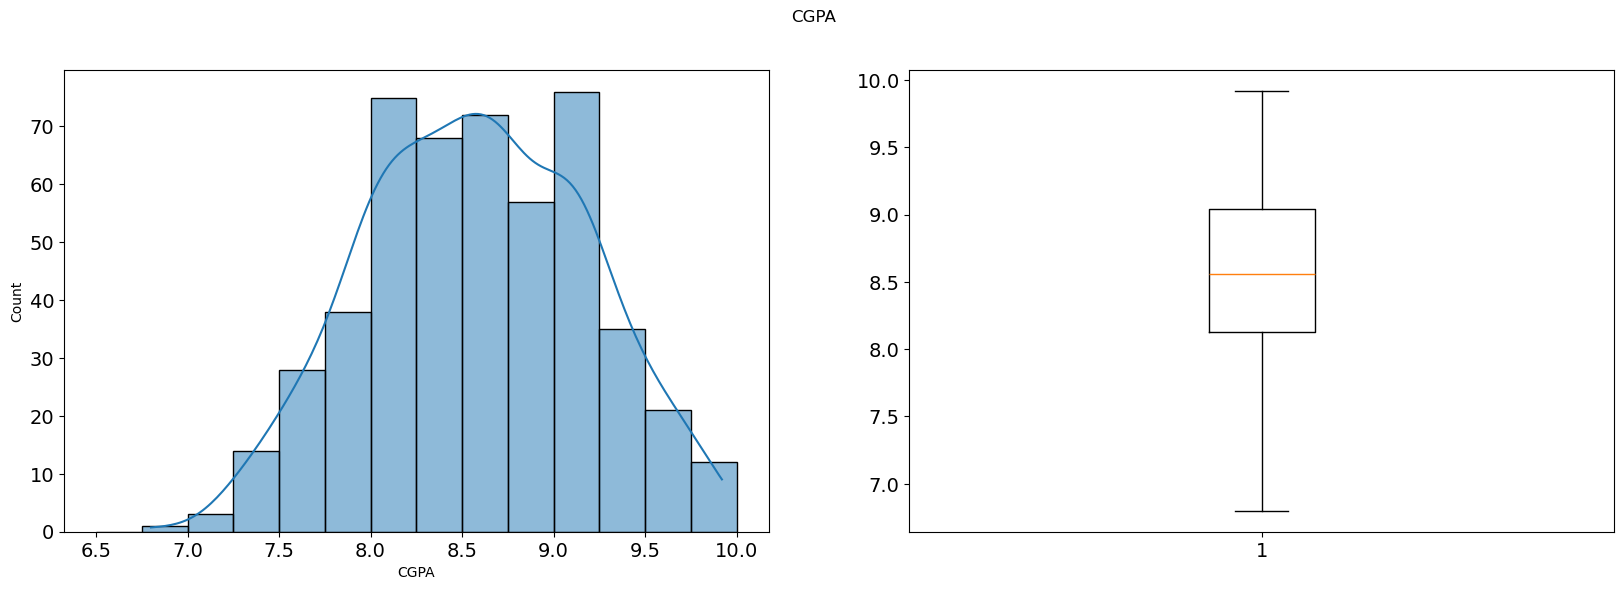

In [14]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('CGPA')
sns.histplot(data=appl_data, x="CGPA",binrange= (6.5,10),binwidth=0.25,ax = ax1, kde = True)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.boxplot(appl_data['CGPA'],manage_ticks=True)
ax2.tick_params(axis='both', which='major', labelsize=14)


###
    CGPA values are between 6.8 to 10 and is almost normally distributed with mean around 8.5 and std of 0.6

### Distribution of GRE

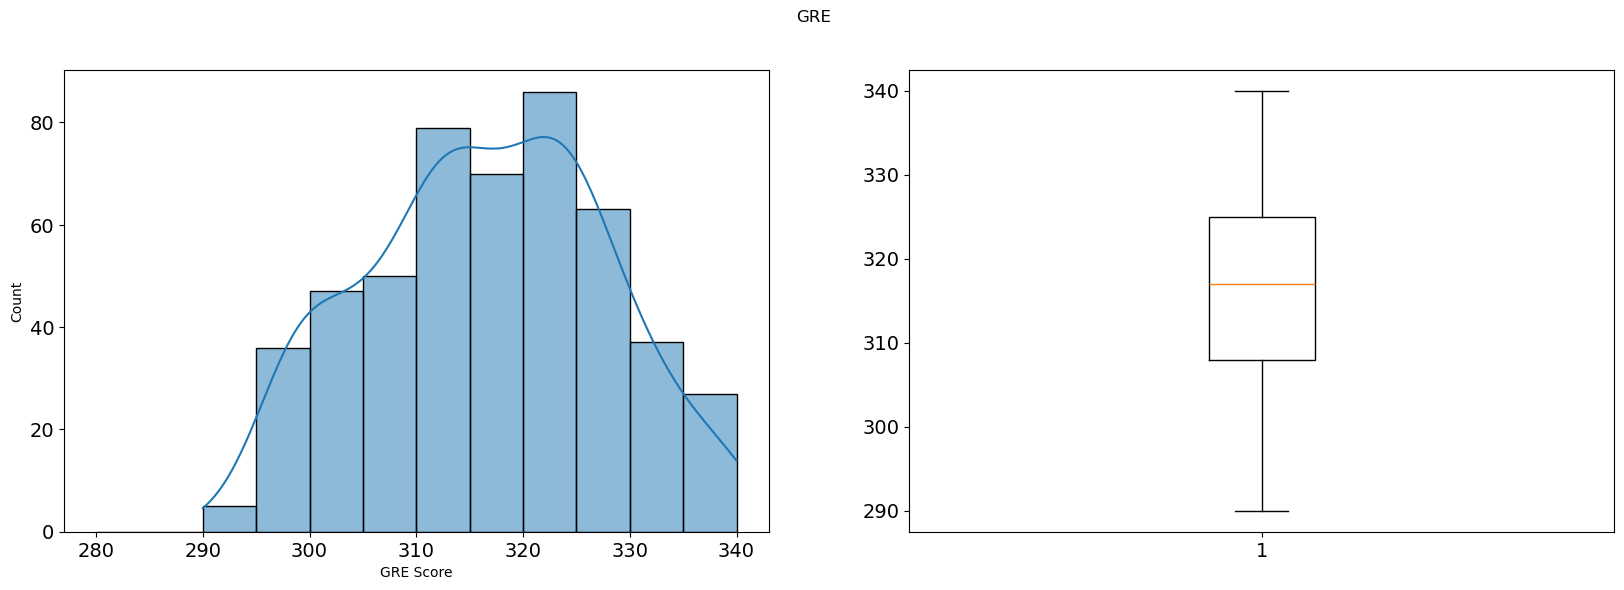

In [17]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('GRE')
sns.histplot(data=appl_data, x="GRE Score",ax = ax1,binrange= (280,340),binwidth=5, kde = True)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.boxplot(appl_data['GRE Score'],manage_ticks=True)
ax2.tick_params(axis='both', which='major', labelsize=14)


###
    GRE Scores are between 290 to 340 and is almost normally distributed with mean around 315 and std of 11

### Distribution of TOEFL

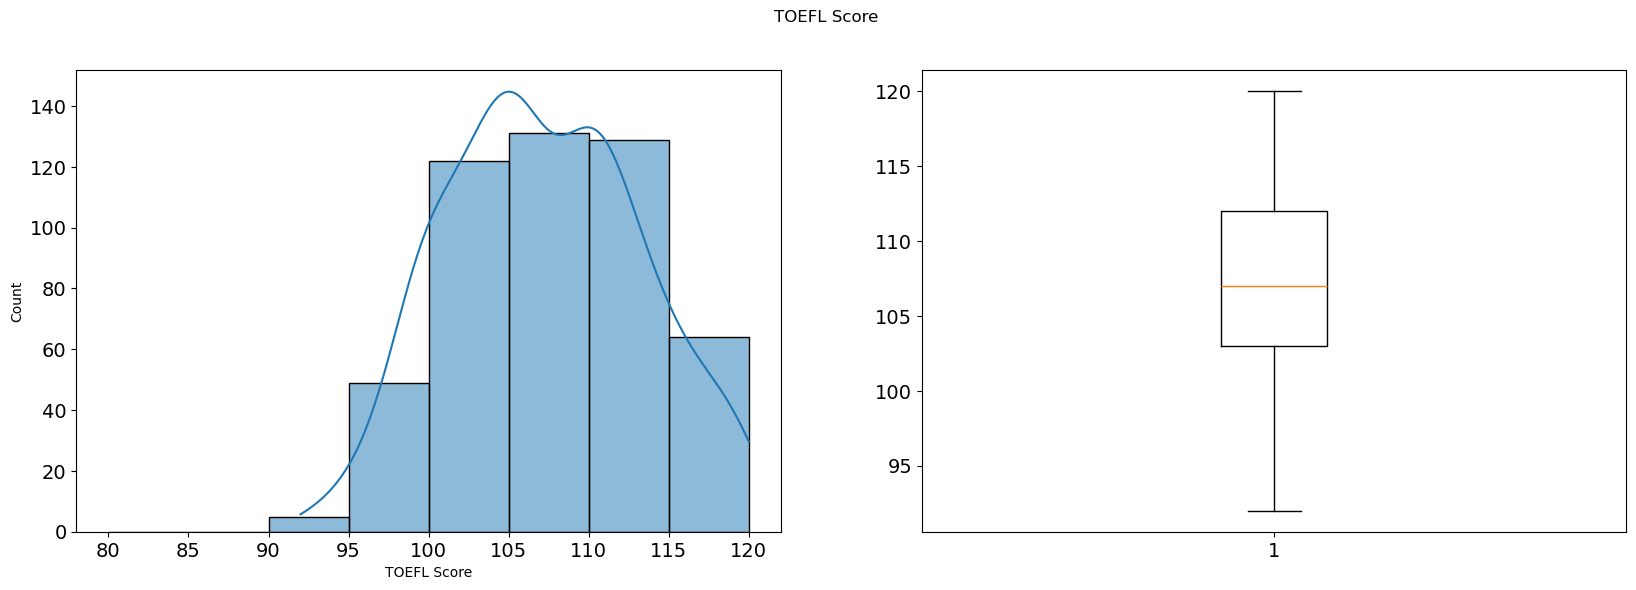

In [20]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('TOEFL Score')
sns.histplot(data=appl_data, x="TOEFL Score",ax = ax1,binrange= (80,120),binwidth=5, kde = True)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.boxplot(appl_data['TOEFL Score'],manage_ticks=True)
ax2.tick_params(axis='both', which='major', labelsize=14)


###
    TOEFL Scores are between 90 to 120 and is almost normally distributed with mean around 105 and std  of 6

### Distribution of Chance of Admission

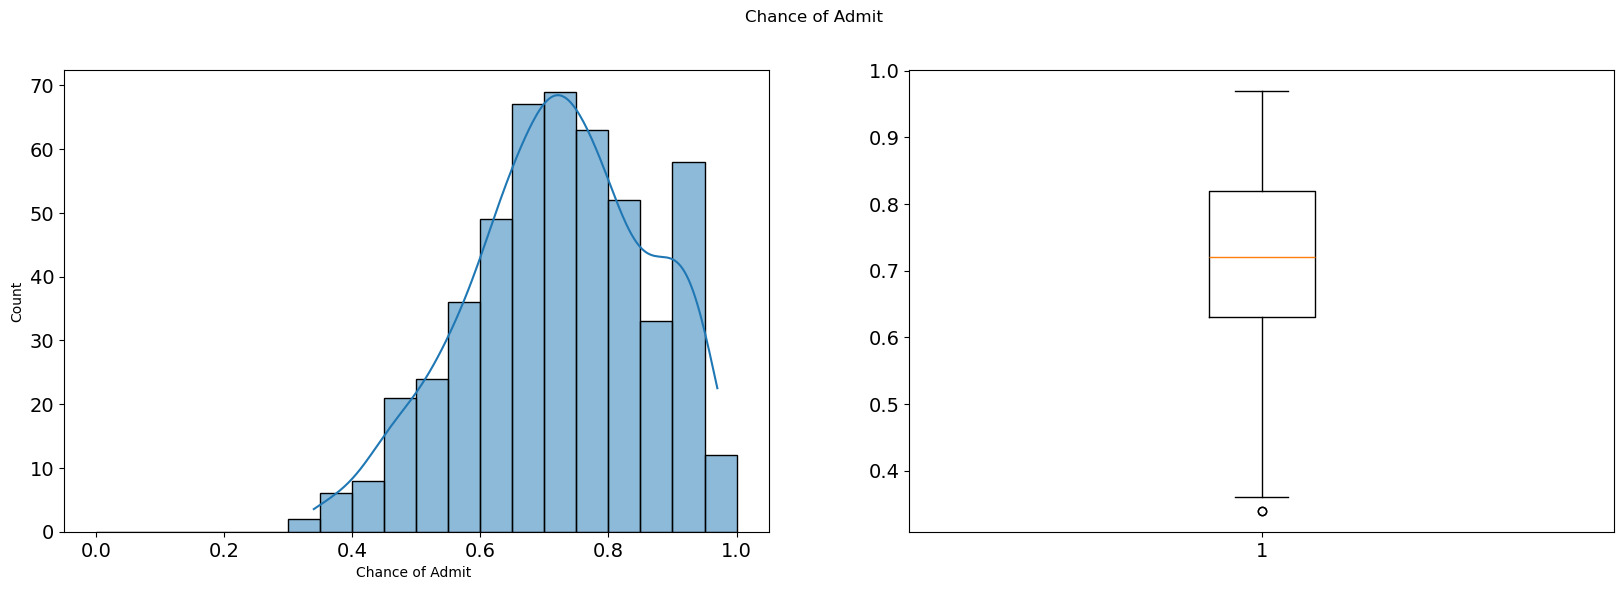

In [23]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('Chance of Admit')
sns.histplot(data=appl_data, x='Chance of Admit ',ax = ax1,binrange= (0,1),binwidth=0.05, kde = True)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.boxplot(appl_data['Chance of Admit '],manage_ticks=True)
ax2.tick_params(axis='both', which='major', labelsize=14)


###
    Chances of Admit are between 0.2 to 1 and is almost normally distributed with mean around 0.75 and std of 0.15

###  Distribution of LOR

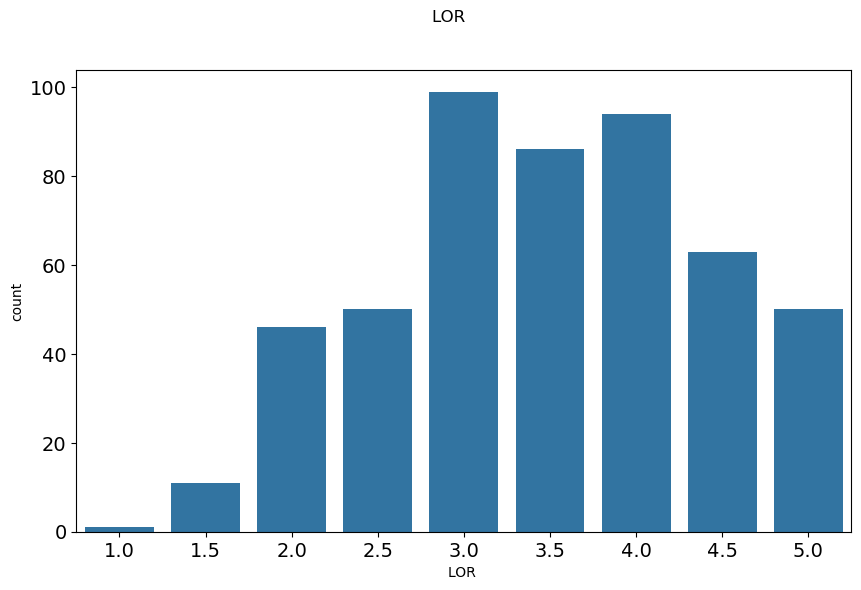

In [26]:

fig, (ax2) = plt.subplots(1, 1, figsize = (10,6))
fig.suptitle('LOR ')
sns.countplot(ax = ax2, data = appl_data, x = 'LOR ')
ax2.tick_params(axis='both', which='major', labelsize=14)

###
    LOR is almost normal with mean 3.5 and std 1

###   Distribution of SOP

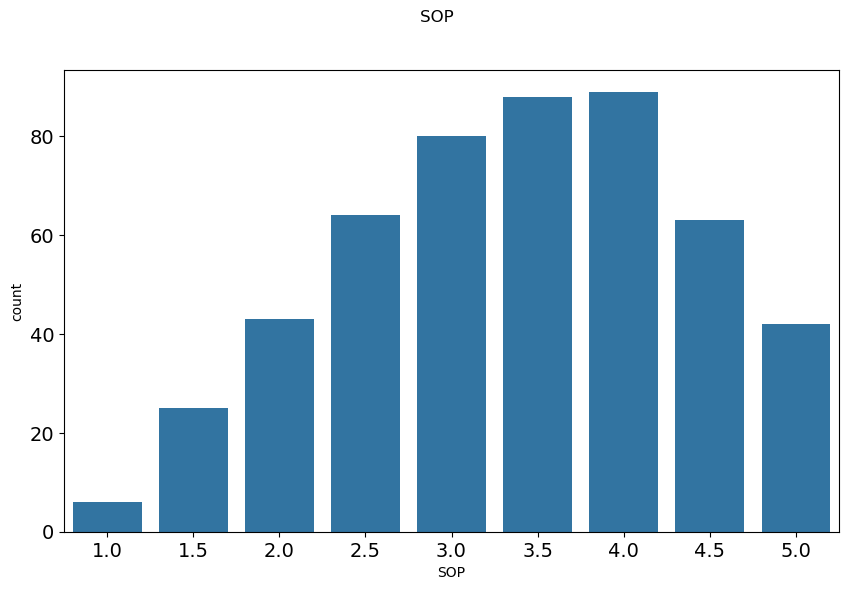

In [29]:

fig, (ax2) = plt.subplots(1, 1, figsize = (10,6))
fig.suptitle('SOP ')
sns.countplot(ax = ax2, data = appl_data, x = 'SOP')
ax2.tick_params(axis='both', which='major', labelsize=14)


###
    SOP is almost normal with mean 3.5 and std 1

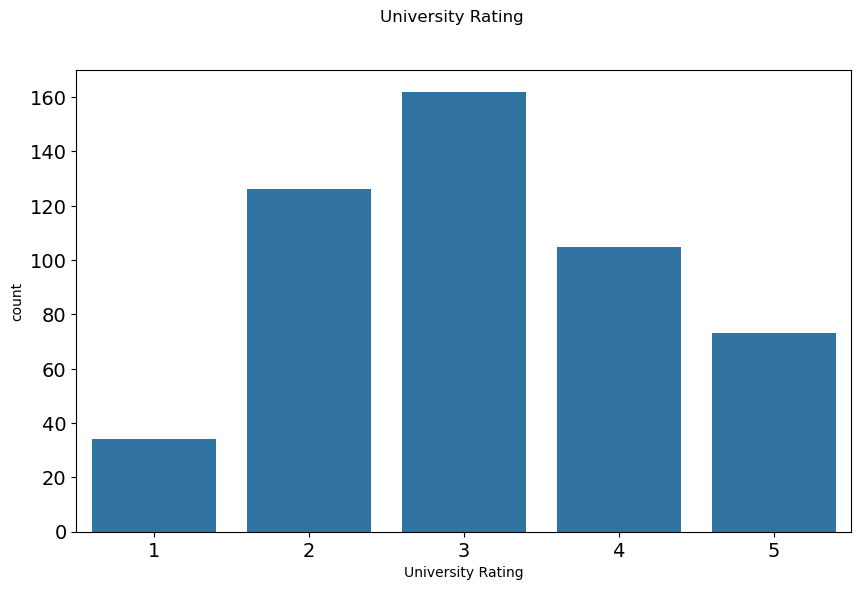

In [31]:
# Distribution of University Rating
fig, (ax2) = plt.subplots(1, 1, figsize = (10,6))
fig.suptitle('University Rating')
sns.countplot(ax = ax2, data = appl_data, x = 'University Rating')
ax2.tick_params(axis='both', which='major', labelsize=14)

###
    University Rating is normally distributed with mean 3 and std 1

###   Distribution of Research

([<matplotlib.patches.Wedge at 0x1e1d63c1be0>,
 [Text(-0.20611945413751356, 1.080515974257694, '1'),
  Text(0.20611945413751367, -1.080515974257694, '0')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%  (280)'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%  (220)')])

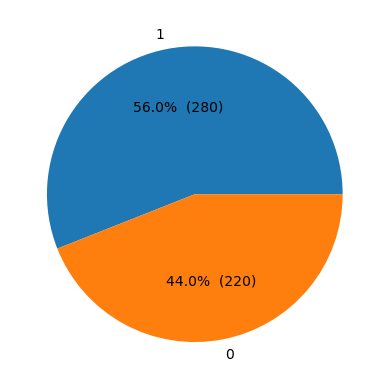

In [34]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%  ({val})'
    return my_autopct
sizes = [appl_data['Research'].sum(),(appl_data.shape[0] - appl_data['Research'].sum())]
plt.pie(sizes,labels = [1,0],autopct= make_autopct(sizes))

###
    Research is distributed almost in half between 0 and 1. So, there's no feature imbalance in terms of research

### Outliers based on Distributions of Features
*    GRE Score, TOEFL Score and CGPA dont have outliers based on the boxplots
*    The other features are either ordinal or binary variables and seem to have good spread 

### Plotting features with the target variable Chance of Admit

[Text(0.5, 1.0, 'GRE Score Vs Chance of Admit')]

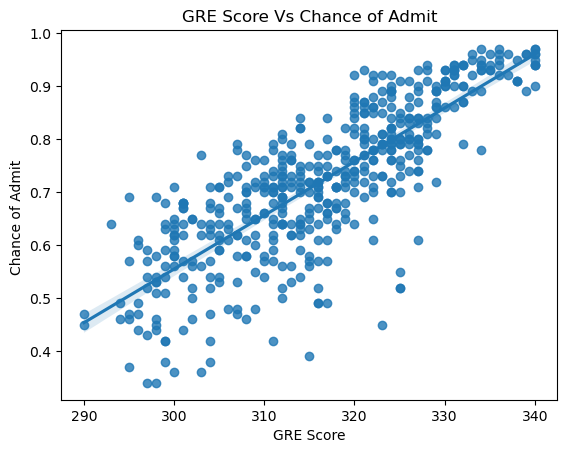

In [38]:
# Scatter and Regression plot for GRE Vs Chance of Admission
sns.regplot(appl_data, x = 'GRE Score', y = 'Chance of Admit ').set(title = "GRE Score Vs Chance of Admit")

[Text(0.5, 1.0, 'TOEFL Score Vs Chance of Admit')]

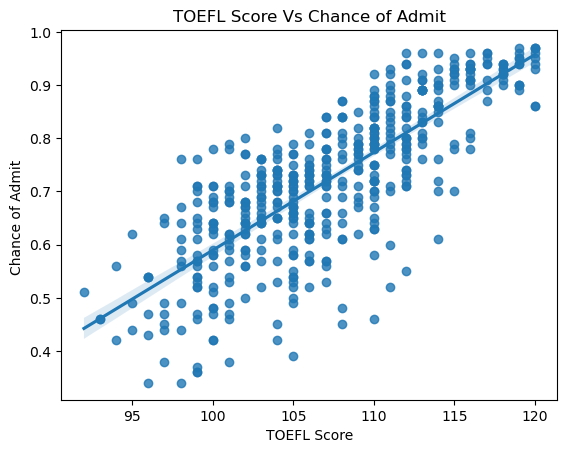

In [39]:
# Scatter and Regression plot for TOEFL Vs Chance of Admission
sns.regplot(appl_data, x = 'TOEFL Score', y = 'Chance of Admit ').set(title = 'TOEFL Score Vs Chance of Admit')

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

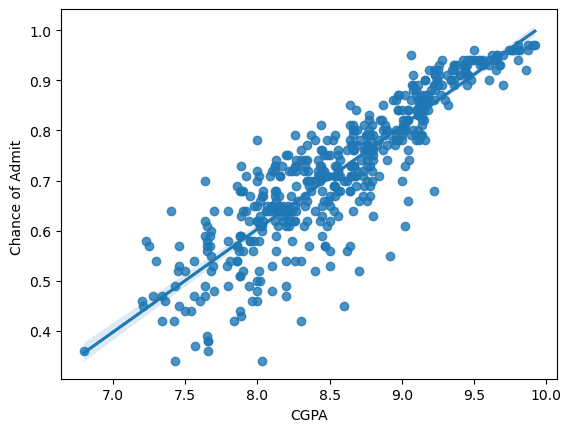

In [40]:
# Scatter and Regression plot for CGPA Vs Chance of Admission
sns.regplot(appl_data, x = 'CGPA', y = 'Chance of Admit ')

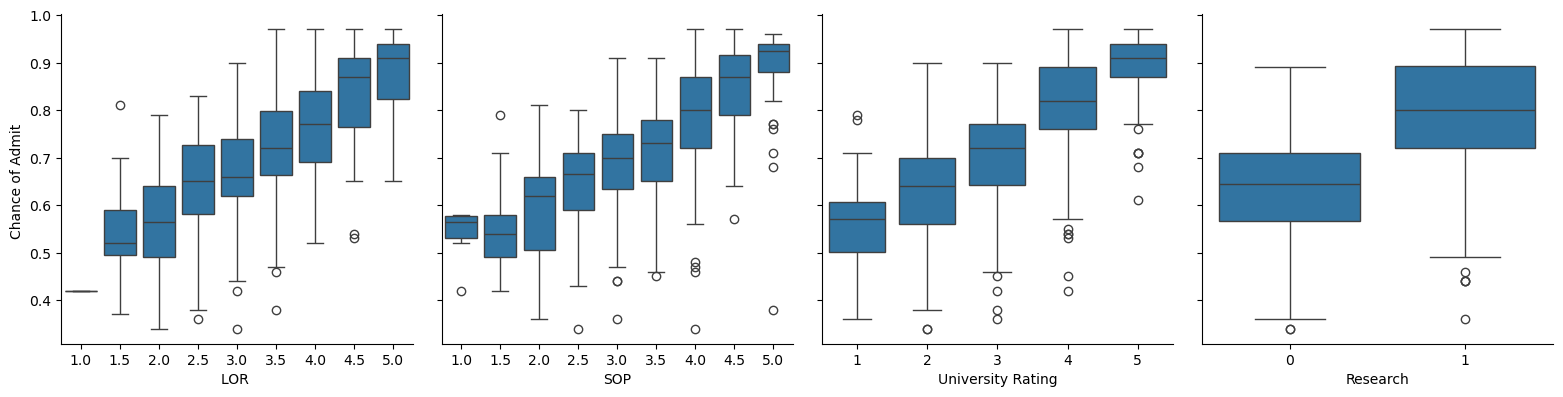

In [41]:
# Box plots between ordinal scores vs Chance of Admission
g = sns.PairGrid(appl_data,x_vars=['LOR ','SOP','University Rating','Research'],y_vars=['Chance of Admit '],height = 4)
g.map(sns.boxplot)

<Axes: >

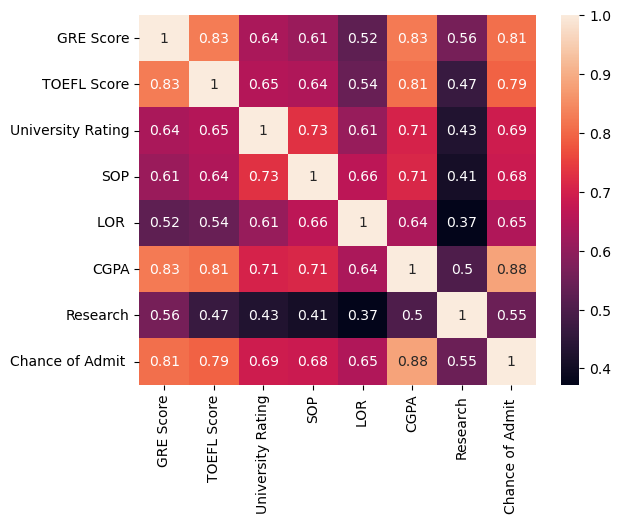

In [42]:
# Correlaion Heatmap between all variables
sns.heatmap(appl_data.corr(),annot=True)

### Inferences based on Bivariate Analysis
*  GRE Score, TOEFL Score and CGPA are positively correlated with the Chance of Admit with 0.81,0.79 and 0.88 as correlation respectively.
*  By using the boxplots we can see that LOR, SOP and University Rating are also positively correlated with Chance of Admit but to a lesser extent than the other features.
*  Research is feature with the least correlation with other features among the features.
*  GRE Score, TOEFL Score, LOR, SOP, CGPA and University Rating are all positively correlated with each other with the highest correlation between the GRE Score and TOEFL Score of 0.83. 
*   These correlations indicate High Score of applicants in GRE, TOEFL, CGPA and University Rating means high scores in other features and in turn giving high chances of Admit in Ivy Leagues
*   High CGPA seems to be the best indicator of Chance of Admit among the feartures.


### Data Preparation for Linear Regression

In [45]:

# No categorical features , So no need for Encoding
# Train-Test Split in 80:20 ratio:
X_train, X_test, y_train, y_test = train_test_split( appl_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']], appl_data['Chance of Admit '], test_size=0.2, random_state=42)
print("Shape of Train dataset:",X_train.shape,y_train.shape)
print("Shape of test Dataset",X_test.shape,y_test.shape)


Shape of Train dataset: (400, 7) (400,)
Shape of test Dataset (100, 7) (100,)


In [46]:
# Scaling the features using a standard scaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

print("Standardized Data (Z-score Normalization) Example:",X_train_scaled.head())

# Reindex y_train
y_train = y_train.reset_index().drop(columns = 'index')


Standardized Data (Z-score Normalization) Example:    GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   0.389986     0.602418          -0.098298  0.126796  0.564984  0.415018   
1  -0.066405     0.602418           0.775459  0.633979  1.651491 -0.067852   
2  -1.253022    -0.876917          -0.098298  0.126796 -0.521524 -0.134454   
3  -0.248961    -0.055064          -0.972054 -0.887570  0.564984 -0.517420   
4  -0.796631    -0.219435          -0.098298  0.126796 -1.064777 -0.617324   

   Research  
0  0.895434  
1 -1.116777  
2 -1.116777  
3 -1.116777  
4  0.895434  


In [47]:
X_train_scaled_new = sm.add_constant(X_train_scaled) # Adding a constant for Linear Regression

In [48]:
# The Linear Model on train data
model = sm.OLS(y_train, X_train_scaled_new)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          3.41e-142
Time:                        21:18:14   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

In [49]:
y_pred_train = results.predict(X_train_scaled_new)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred_train)
print(f"MAE: {mae:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE: {rmse:.2f}")

# R-squared (R2)
r2 = r2_score(y_train, y_pred_train)
print(f"R-squared: {r2:.2f}")

# Adjusted r2 score = 1-(1-R2)*(n-1)/(n-p-1)
n = X_train_scaled_new.shape[0]
p = X_train_scaled_new.shape[1]
r2_adjusted = (1-(1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared: {r2_adjusted:.2f}")

MAE: 0.04
RMSE: 0.06
R-squared: 0.82
Adjusted R-squared: 0.82


In [50]:

X_test_scaled_new = sm.add_constant(pd.DataFrame(scaler.transform(X_test),columns = X_test.columns))
y_pred_test = results.predict(X_test_scaled_new)
# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"MAE: {mae_test:.2f}")

# Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {rmse_test:.2f}")

# R-squared (R2)
r2_test = r2_score(y_test, y_pred_test)
print(f"R-squared: {r2_test:.2f}")

# Adjusted r2 score = 1-(1-R2)*(n-1)/(n-p-1)
n = X_test_scaled_new.shape[0]
p = X_test_scaled_new.shape[1]
r2_adjusted_test = (1-(1-r2_test)*(n-1)/(n-p-1))
print(f"Adjusted R-squared: {r2_adjusted_test:.2f}")

MAE: 0.04
RMSE: 0.06
R-squared: 0.82
Adjusted R-squared: 0.80


In [51]:
# Removing variables with p>0.05
# Removing University Rating and SOP
X_train_scaled_new_af = X_train_scaled_new.drop(columns = ['University Rating','SOP'])
# fitting again
model_1 = sm.OLS(y_train, X_train_scaled_new_af)
results_1 = model_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          1.36e-144
Time:                        21:18:14   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    241.830      

### Inferences from Initial Linear Regression
*   Adjusted R squared is the same (0.818) in OLS before and after removing variables with p>0.05
*   This implies University Rating and SOP dont contribute much towards predicting chance of admit even if there is correlation between them and chance of admit.
*   As indicated by the correlation heatmap of features the CGPA variable seems to have the highest coefficient among non bias features and contribute most to prediction
*   GRE Score, TOEFL Score , LOR, and Research come next in contribution to prediction in that order
*   High F-statistic and very low probability of f statistic indicate model is significant compared to mean
*   Low p values of coefficients indicate strong evidence against null hypothesis

## Assumptions of Linear Regression
### Multicollinearity check by VIF score

In [54]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a list of the independent variables
X_vars = ["GRE Score","TOEFL Score","LOR ","CGPA","Research","University Rating","SOP"]

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif['Feature'] = X_vars
vif['VIF'] = [variance_inflation_factor(X_train_scaled_new[X_vars].values, i) for i in range(len(X_vars))]

print(vif)

             Feature       VIF
0          GRE Score  4.489983
1        TOEFL Score  3.664298
2               LOR   1.977698
3               CGPA  4.654540
4           Research  1.518065
5  University Rating  2.572110
6                SOP  2.785764


* As the variables have VIF < 5 there is no Multicollinearity detected


### Mean of Residuals

In [57]:
y_test = y_test.reset_index().drop(columns = 'index')['Chance of Admit ']
y_test
residuals = (y_test - y_pred_test)
print(residuals.head())
residuals.mean()

0    0.015425
1    0.044819
2   -0.182660
3    0.062630
4   -0.075883
dtype: float64


-0.005453623717661577

*  Mean of Residuals is close to zero

### Linear relationship between independent & dependent variables.
*    From the pairplots and correlation heatmaps in the Pairwise Analysis, we can say that there is linear relationship between dependent variable and independent variables.

### Homoscedasticity

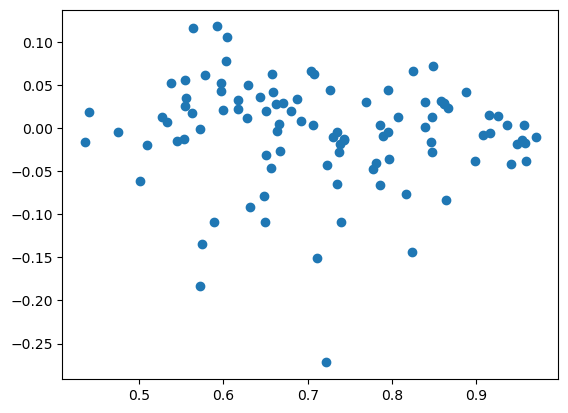

In [61]:
# Homoscedasticity - Scatter plot between Residuals and predicted values
plt.scatter(y_pred_test,residuals)

In [62]:

gq_result = het_goldfeldquandt(pd.DataFrame(residuals), pd.DataFrame(y_pred_test))
print(f"F-statistic: {gq_result[0]}")
print(f"p-value: {gq_result[1]}")

F-statistic: 0.6055526829850864
p-value: 0.9588709395346813


*   Scatterplot shows some variance between residuals and predicted values
*   p-value of F-Statistic greated than 0.05 implies presence of homoscedasticity

###  Normality of Residuals

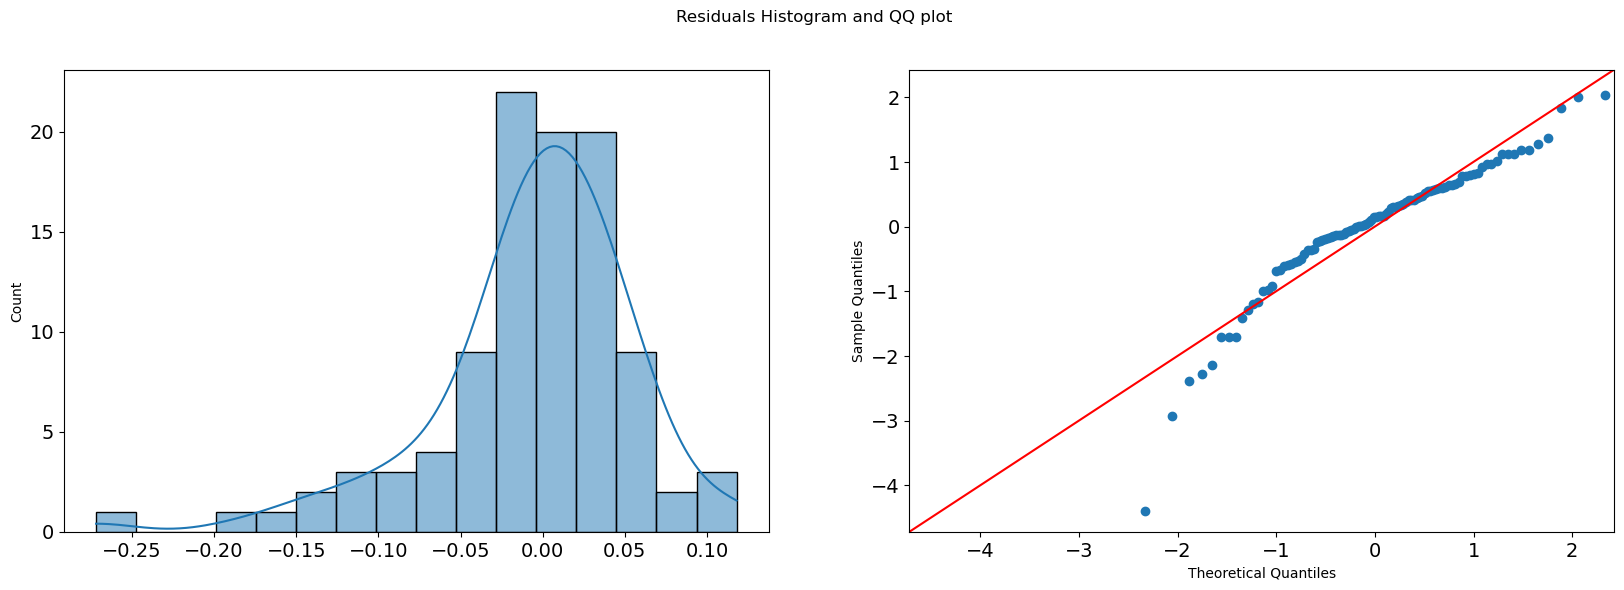

In [65]:

# QQ plot and histogram of residuals

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('Residuals Histogram and QQ plot')
sns.histplot(residuals,ax = ax1, kde = True)
ax1.tick_params(axis='both', which='major', labelsize=14)
sm.qqplot(residuals,line = '45',ax = ax2,fit = True)
ax2.tick_params(axis='both', which='major', labelsize=14)



*    There is little deviation from diagonal in the qq plot implies that residuals are not normal. 
*    Distribution in Residuals is slightly skewed.


*  From the tests for Assumption of Linear Regression we can see that the assumption of normality of residuals seems to be wrong.

### Applying L1 and L2 and Elastic net Regression

In [69]:
# L1 Regression
# getting OLS model and fitting regularized
model_l1 = sm.OLS(y_train,X_train_scaled_new)
alpha = 0.01
results_L1 = model_l1.fit_regularized(L1_wt = 1,alpha = alpha)
summary_L1 = results_L1.params

y_pred_train = results_L1.predict(X_train_scaled_new)
# Mean Absolute Error (MAE)
summary_L1.loc['MAE Train Set'] =  mean_absolute_error(y_train, y_pred_train)

# Root Mean Squared Error (RMSE)
summary_L1.loc['RMSE Train Set'] =   np.sqrt(mean_squared_error(y_train, y_pred_train))

# R-squared (R2)
summary_L1.loc['R2 Train Set'] = r2_score(y_train, y_pred_train)

# Adjusted r2 score = 1-(1-R2)*(n-1)/(n-p-1)
n = X_train_scaled_new.shape[0]
p = X_train_scaled_new.shape[1]
summary_L1.loc['Adjusted R2 Train Set'] = (1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1))
y_pred_test = results_L1.predict(X_test_scaled_new)
# Mean Absolute Error (MAE)
summary_L1.loc['MAE Test Set'] =  mean_absolute_error(y_test, y_pred_test)

# Root Mean Squared Error (RMSE)
summary_L1.loc['RMSE Test Set'] =   np.sqrt(mean_squared_error(y_test, y_pred_test))

# R-squared (R2)
summary_L1.loc['R2 Test Set'] = r2_score(y_test, y_pred_test)

# Adjusted r2 score = 1-(1-R2)*(n-1)/(n-p-1)
n = X_test_scaled_new.shape[0]
p = X_test_scaled_new.shape[1]
summary_L1.loc['Adjusted R2 Test Set'] = (1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1))

summary_L1

const                    0.714175
GRE Score                0.029547
TOEFL Score              0.014740
University Rating        0.001616
SOP                      0.000000
LOR                      0.011188
CGPA                     0.069022
Research                 0.000000
MAE Train Set            0.046501
RMSE Train Set           0.062157
R2 Train Set             0.803973
Adjusted R2 Train Set    0.799962
MAE Test Set             0.045287
RMSE Test Set            0.062410
R2 Test Set              0.809534
Adjusted R2 Test Set     0.792790
dtype: float64

In [70]:
# L2 Regression (Ridge)
# getting OLS model and fitting regularized
model_l2 = sm.OLS(y_train,X_train_scaled_new)
alpha = 0.01
results_L2 = model_l2.fit_regularized(L1_wt = 0,alpha = alpha)
summary_L2 = results_L2.params
summary_L2 = pd.Series(summary_L2,index = X_train_scaled_new.columns)

y_pred_train = results_L2.predict(X_train_scaled_new)
# Mean Absolute Error (MAE)
summary_L2.loc['MAE Train Set'] =  mean_absolute_error(y_train, y_pred_train)

# Root Mean Squared Error (RMSE)
summary_L2.loc['RMSE Train Set'] =   np.sqrt(mean_squared_error(y_train, y_pred_train))

# R-squared (R2)
summary_L2.loc['R2 Train Set'] = r2_score(y_train, y_pred_train)

# Adjusted r2 score = 1-(1-R2)*(n-1)/(n-p-1)
n = X_train_scaled_new.shape[0]
p = X_train_scaled_new.shape[1]
summary_L2.loc['Adjusted R2 Train Set'] = (1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1))
y_pred_test = results_L1.predict(X_test_scaled_new)
# Mean Absolute Error (MAE)
summary_L2.loc['MAE Test Set'] =  mean_absolute_error(y_test, y_pred_test)

# Root Mean Squared Error (RMSE)
summary_L2.loc['RMSE Test Set'] =   np.sqrt(mean_squared_error(y_test, y_pred_test))

# R-squared (R2)
summary_L2.loc['R2 Test Set'] = r2_score(y_test, y_pred_test)

# Adjusted r2 score = 1-(1-R2)*(n-1)/(n-p-1)
n = X_test_scaled_new.shape[0]
p = X_test_scaled_new.shape[1]
summary_L2.loc['Adjusted R2 Test Set'] = (1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1))

summary_L2

const                    0.717005
GRE Score                0.027107
TOEFL Score              0.018717
University Rating        0.003354
SOP                      0.002365
LOR                      0.015965
CGPA                     0.065392
Research                 0.011978
MAE Train Set            0.043912
RMSE Train Set           0.059826
R2 Train Set             0.818399
Adjusted R2 Train Set    0.814684
MAE Test Set             0.045287
RMSE Test Set            0.062410
R2 Test Set              0.809534
Adjusted R2 Test Set     0.792790
dtype: float64

In [71]:
# ElasticNet Regression with ratio li:l2 = 1
# getting OLS model and fitting regularized
model_elasticnet = sm.OLS(y_train,X_train_scaled_new)
alpha = 0.01
results_elasticnet = model_elasticnet.fit_regularized(L1_wt = 0.5,alpha = alpha)
summary_elasticnet = results_elasticnet.params
summary_elasticnet = pd.Series(summary_elasticnet,index = X_train_scaled_new.columns)

y_pred_train = results_elasticnet.predict(X_train_scaled_new)
# Mean Absolute Error (MAE)
summary_elasticnet.loc['MAE Train Set'] =  mean_absolute_error(y_train, y_pred_train)

# Root Mean Squared Error (RMSE)
summary_elasticnet.loc['RMSE Train Set'] =   np.sqrt(mean_squared_error(y_train, y_pred_train))

# R-squared (R2)
summary_elasticnet.loc['R2 Train Set'] = r2_score(y_train, y_pred_train)

# Adjusted r2 score = 1-(1-R2)*(n-1)/(n-p-1)
n = X_train_scaled_new.shape[0]
p = X_train_scaled_new.shape[1]
summary_elasticnet.loc['Adjusted R2 Train Set'] = (1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1))
y_pred_test = results_L1.predict(X_test_scaled_new)
# Mean Absolute Error (MAE)
summary_elasticnet.loc['MAE Test Set'] =  mean_absolute_error(y_test, y_pred_test)

# Root Mean Squared Error (RMSE)
summary_elasticnet.loc['RMSE Test Set'] =   np.sqrt(mean_squared_error(y_test, y_pred_test))

# R-squared (R2)
summary_elasticnet.loc['R2 Test Set'] = r2_score(y_test, y_pred_test)

# Adjusted r2 score = 1-(1-R2)*(n-1)/(n-p-1)
n = X_test_scaled_new.shape[0]
p = X_test_scaled_new.shape[1]
summary_elasticnet.loc['Adjusted R2 Test Set'] = (1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1))

summary_elasticnet

const                    0.715597
GRE Score                0.031480
TOEFL Score              0.016412
University Rating        0.003140
SOP                      0.001274
LOR                      0.013647
CGPA                     0.067239
Research                 0.000000
MAE Train Set            0.044976
RMSE Train Set           0.061081
R2 Train Set             0.810702
Adjusted R2 Train Set    0.806829
MAE Test Set             0.045287
RMSE Test Set            0.062410
R2 Test Set              0.809534
Adjusted R2 Test Set     0.792790
dtype: float64

In [72]:
# Summary table for model with variables of p>0.05 removed
summary_v = pd.DataFrame(results_1.params,columns = ['With features of p>0.05 removed'])
summary_v.loc['University Rating'] = 0
summary_v.loc['SOP'] = 0
y_pred_train = results_1.predict(X_train_scaled_new_af)
summary_v.loc["MAE Train Set"] = mean_absolute_error(y_train, y_pred_train)
summary_v.loc["RMSE Train Set"] = np.sqrt(mean_squared_error(y_train, y_pred_train))
summary_v.loc["R2 Train Set"] = r2_score(y_train, y_pred_train)
n = X_train_scaled_new_af.shape[0]
p = X_train_scaled_new_af.shape[1]
summary_v.loc["Adjusted R2 Train Set"] = (1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1))
X_test_scaled_new_af = X_test_scaled_new.drop(columns = ['University Rating','SOP'])
y_pred_test_v = results_1.predict(X_test_scaled_new_af)
summary_v.loc["MAE Test Set"] = mean_absolute_error(y_test, y_pred_test_v)
summary_v.loc["RMSE Test Set"] = np.sqrt(mean_squared_error(y_test, y_pred_test_v))
summary_v.loc["R2 Test Set"] = r2_score(y_test, y_pred_test_v)
n = X_test_scaled_new_af.shape[0]
p = X_test_scaled_new_af.shape[1]
summary_v.loc["Adjusted R2 Test Set"] = (1-(1-r2_score(y_test, y_pred_test_v))*(n-1)/(n-p-1))


### Results Summary

In [74]:


results_summary = pd.DataFrame(results.params,columns = ['Without Regularization'])

results_summary = pd.concat([results_summary,pd.DataFrame(pd.Series({"MAE Train Set":mae,
                                     "RMSE Train Set":rmse,
                                     "R2 Train Set":r2,
                                     "Adjusted R2 Train Set":r2_adjusted,
                                     "MAE Test Set":mae_test,
                                     "RMSE Test Set":rmse_test,
                                     "R2 Test Set":r2_test,
                                     "Adjusted R2 Test Set":r2_adjusted_test})
                                     ,columns = ["Without Regularization"])])
results_summary['With features of p>0.05 removed'] = summary_v
results_summary['With L1 (alpha = 0.01)'] = summary_L1
results_summary['With L2 (alpha = 0.01)'] = summary_L2
results_summary['With ElasticNet (alpha = 0.01)'] = summary_elasticnet
results_summary

,Without Regularization,With features of p>0.05 removed,With L1 (alpha = 0.01),With L2 (alpha = 0.01),With ElasticNet (alpha = 0.01)
const,0.724175,0.724175,0.714175,0.717005,0.715597
GRE Score,0.026671,0.026879,0.029547,0.027107,0.031480
TOEFL Score,0.018226,0.019106,0.014740,0.018717,0.016412
University Rating,0.002940,0.000000,0.001616,0.003354,0.003140
SOP,0.001788,0.000000,0.000000,0.002365,0.001274
LOR,0.015866,0.017207,0.011188,0.015965,0.013647
CGPA,0.067581,0.069066,0.069022,0.065392,0.067239
Research,0.011940,0.012226,0.000000,0.011978,0.000000
MAE Train Set,0.042533,0.042691,0.046501,0.043912,0.044976
RMSE Train Set,0.059385,0.059440,0.062157,0.059826,0.061081


### Insights from Regression Analysis
*   CGPA seems to be the best indicator of chance of admission in Ivy Leagues 
*   GRE Score, TOEFL Score, LOR score also contribute towards prediction of chance.
*   Removing features with p value >0.05 doesn't change the Adjusted r2 score by a huge margin, implying University Rating and SOP having less predictive power
*   Using L1 Regression  with alpha = 0.01 doesnt change the Adjusted r2 score by a huge margin indicating SOP and Research having less predictive power as their coefficients are zero in the model
*   High F-statistic and very low probability of f statistic indicate model is significant compared to mean 
*   Normality in residuals which is a key assumption is not met indicating outliers, missing data or linear function not being the best model. This also indicates violation of other assumptions.
*   ~0.8 r2 score indicates model explains 80% of the relationship between independent features and target variable.
*   The model can be improved by applying Polynomial Regression, adding new relevant variables or getting more data.


### Recommendations
*   Updates to the dataset and chances of admissions can be made after every new admission or rejection of an applicant.
*   Other features like Relevant work experience, Relevance of Undergraduate Degree, Degree applied for, Competition for degree, Quality of Resume can also be included to get a better picture of applicant.
*   Conducting widespread surveys can improve quality of data.
*   By improving the model with better quality, quantity of data and applying more complex functions, the business can benefit in the follwing ways:
    *   Better knowledge for applicants in terms of expectation and admission.
    *   Can improve the brand reliability in terms of helping applicants find their dream University.
    *   Can help candidates identify areas where they can improve or adjust their expectations for better fitting University, in turn giving more confidence for applicants in Jamboree.